<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-главе" data-toc-modified-id="Вывод-по-главе-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по главе</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-главе" data-toc-modified-id="Вывод-по-главе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод по главе</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проекта" data-toc-modified-id="Чек-лист-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проекта</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
RND_ST = 12345

In [2]:
pth = '/datasets/insurance.csv'
if os.path.exists(pth):
    df = pd.read_csv(pth)
else:
    print('Путь не таков')

Создаем функцию для получения общих сведений о датасете

In [3]:
def info_func(df):
    print('Общая информация')
    print('')
    print(df.info())
    print('')
    print(df.describe())
    print('')
    for column in df.columns:
        print('Уникальные значения столбца', column)
        print('')
        print(df[column].unique())
        print('')     
    print('Кол-во строк дубликатов')
    print('')
    print(df[df.duplicated()].count().sort_values(ascending=False))
    print('')
    print('Кол-во пропущенных значений')
    print('')
    print(df.isna().sum().sort_values(ascending=False))
    print('')
    print('Процент пропущенных значений')
    print('')
    print((df.isna().sum()/len(df)*100).sort_values(ascending=False))

In [4]:
info_func(df)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1.091387           0.463183
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%       0.000000    24.000000  33300.000000     0.000000           0.000000
50%       0.00

Убираем дубликаты и приводим типы данных к нужному

In [5]:
df = df.drop_duplicates()

In [6]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], downcast='integer')   

Смотри на результат изменений

In [7]:
info_func(df)

Общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int8   
 1   Возраст            4847 non-null   int8   
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int8   
 4   Страховые выплаты  4847 non-null   int8   
dtypes: float64(1), int8(4)
memory usage: 94.7 KB
None

               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  4847.000000  4847.000000   4847.000000  4847.000000        4847.000000
mean      0.498453    31.023932  39895.811842     1.203425           0.152259
std       0.500049     8.487995   9972.953985     1.098664           0.468934
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%       0.000000    24.000000  33200.000000     0.000000           0.000000
50%       0.0000

### Вывод по главе
* Данные загружены
* Получена сводная информация по всем данным
* Обработаны дубликаты 
* Обработаны типа данных столбцов

In [8]:
df.shape

(4847, 5)

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Проверим вычисляет ли LinearRegression из sklearn.linear_model по формуле: 

In [9]:
features = df.drop('Страховые выплаты',axis=1)
target = df['Страховые выплаты']

In [10]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target
w = np.linalg.inv(X.T @ X) @ X.T @ y
display(w[1:])
model = LinearRegression()
model.fit(features, target)
model.coef_

array([ 9.46018141e-03,  3.61640081e-02, -1.38991363e-07, -1.42517371e-02])

array([ 9.46018141e-03,  3.61640081e-02, -1.38991363e-07, -1.42517371e-02])

Коэфициенты регрессии полностью совпадают. Следовательно LinearRegression из sklearn.linear_model вычисляет по формуле.

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Не изменится.

**Обоснование:** Как видно из вычислений ниже - значение предсказания 
 не меняется (a_1 = a), следовательно не меняется и качество линейной регрессии. 
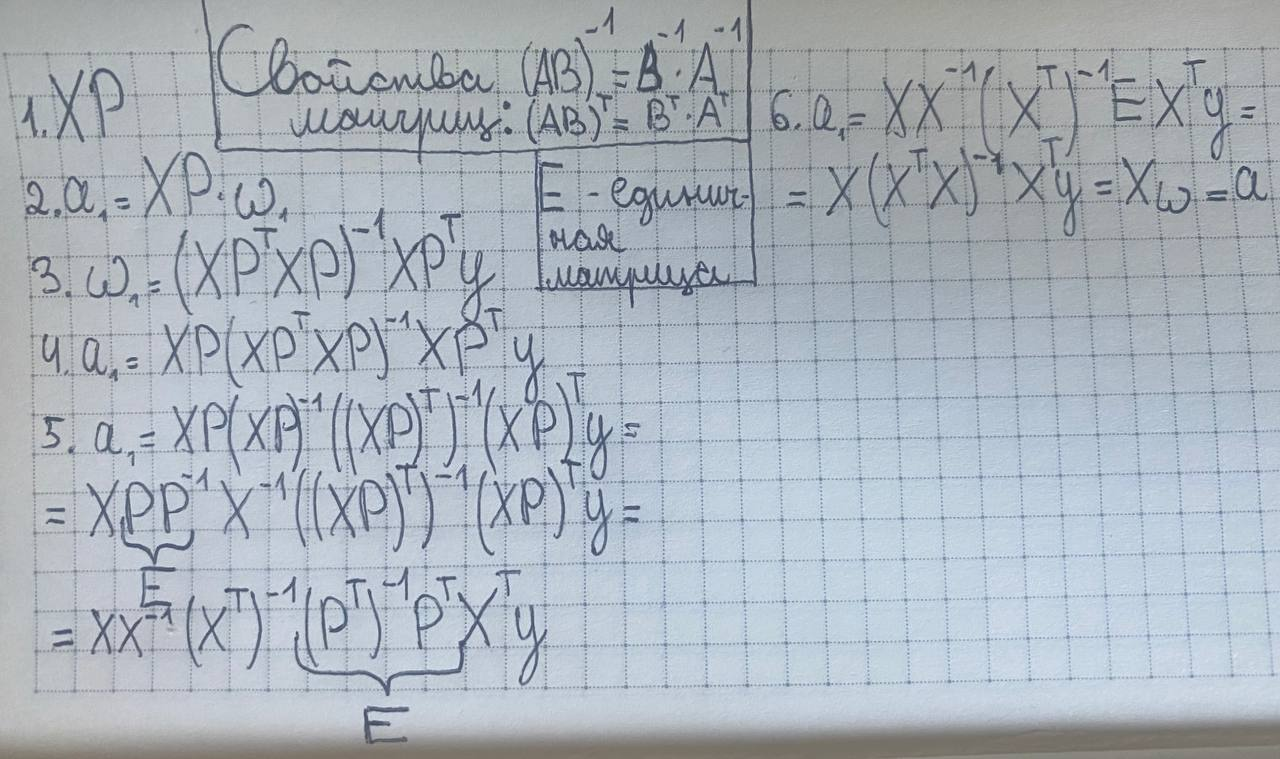

Параметры линейной регрессии в преобразованной задаче будут связаны с параметрами линейной регрессии в исходной задаче следующим образом: wp = P^(-1)w. <br />
argmin𝑤𝑀𝑆𝐸(𝑋𝑃𝑤𝑝,𝑦) сводится к argmin𝑤𝑀𝑆𝐸(𝑋𝑤,𝑦) путем подстановки вместо wp  -  P^(-1)w. Следовательно P и P^-1 у нас сокращается и получается argmin𝑤𝑀𝑆𝐸(𝑋𝑤,𝑦). Следовательно если задачи обучения у нас равнозначны, то и качество линейной регресси не пострадает (?).

### Вывод по главе
* Проверено, что LinearRegression из sklearn.linear_model вычисляет по формуле
* Проверено, что при умножении признаков на обратимую матрицу - не меняется качество линейной регрессии

## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу, которая будет генерироваться рандомно.

Этапы алгоритма:
* 1) Создаём рандомную матрицу R
* 2) Проверяем её на обратимость
* 3) Создаём новую матрицу данных N (исходные данные умножаем на рандомную матрицу)
* 4) Ищем метрики качества R2-score и MSE на исходных данных и на преобразованных


**Обоснование**

Если мы перемножим исходные данные на обратимую матрицу, то результатом предсказания будет произведение нашей изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на столько же, на сколько и признаки тренировочных данных.

## Проверка алгоритма

Создаём рандомную матрицу R

In [11]:
def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(df.shape[1] - 1, df.shape[1] - 1))
        det = np.linalg.det(matrix)
    return matrix

In [12]:
R = get_rand_matrix()

Проверяем её на обратимость

In [13]:
np.linalg.inv(R)

array([[ 1.12816954, -0.54078483,  0.42340062, -1.0417587 ],
       [-0.18477763,  0.82477613, -0.44164292,  0.88236603],
       [ 0.31829798,  0.19165484,  0.05972482, -0.92071659],
       [ 1.26955482, -1.03892132,  1.46181819, -1.04126424]])

Создаём новую матрицу данных N

In [14]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.25, random_state = RND_ST)

In [15]:
N = features_train.dot(R)
N.columns = features_train.columns
N.head()

,Пол,Возраст,Зарплата,Члены семьи
4599,-80770.505738,20836.548647,37340.542088,65446.195380
3882,-75146.265806,19396.498515,34752.511818,60888.361172
4705,-41503.677716,10714.965098,19196.414855,33628.237134
1400,-57522.373215,14861.384041,26619.596605,46605.373442
728,-48182.656045,12449.511399,22297.186932,39038.445208


In [16]:
N_t = features_test.dot(R)
N_t.columns = features_test.columns
N_t.head()

,Пол,Возраст,Зарплата,Члены семьи
1335,-69949.868499,18044.225803,32338.502948,56679.080370
3875,-97663.484744,25192.652082,45150.647274,79134.547980
166,-50250.488205,12978.113331,23245.109068,40716.054809
3003,-28623.746958,7409.643586,13259.183685,23190.179586
424,-40778.432703,10547.412019,18881.235772,33038.393741


In [17]:
X = np.concatenate((np.ones((N.shape[0], 1)), N), axis=1)

In [18]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.0,-80770.505738,20836.548647,37340.542088,65446.195380
1,1.0,-75146.265806,19396.498515,34752.511818,60888.361172
2,1.0,-41503.677716,10714.965098,19196.414855,33628.237134
3,1.0,-57522.373215,14861.384041,26619.596605,46605.373442
4,1.0,-48182.656045,12449.511399,22297.186932,39038.445208


Ищем метрики качества R2-score и MSE на исходных данных и на преобразованных

In [19]:
y = target_train
w = np.linalg.inv(X.T @ X) @ X.T @ y

In [20]:
a = N_t.dot(w[1:]) + w[0]

In [21]:
model_1 = LinearRegression()
model_1.fit(features_train,target_train)
predictions = model_1.predict(features_test)

R2_score_1 = r2_score(target_test, predictions)
MSE_1 = mean_squared_error(predictions,target_test)

print("R2_score Линейной регрессии неизменённой матрицы:", R2_score_1)
print("MSE Линейной регрессии неизменённой матрицы:", MSE_1)

R2_score Линейной регрессии неизменённой матрицы: 0.42307727492147584
MSE Линейной регрессии неизменённой матрицы: 0.11955009374099854


In [22]:
R2_score_2 =  r2_score(target_test, a)
MSE_2 = mean_squared_error(a, target_test)
print("R2_score Линейной регрессии изменённой матрицы:",R2_score_2)
print("MSE Линейной регрессии изменённой матрицы:", MSE_2)

R2_score Линейной регрессии изменённой матрицы: 0.4230772610673702
MSE Линейной регрессии изменённой матрицы: 0.11955009661185031


Как мы можем видеть, R2_score и MSE идентичны на 7 знаков после запятой, что можно считать тем результатом, которого мы хотели достигнуть. 

## Общий вывод
Мы защитили персональные данные клиентов страховой компании при этом не потеряв качество моделей обучения. Был разработан алгоритм, где исходные данные перемножались на рандомную обратимую матрицу R и получалась новая матрица N. Так же мы произвели обработку изначальных данных - удалив строки дубликаты и приведя данные к нужному типу данных.

## Чек-лист проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования